Import the neccesary libraries

In [47]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2023-10-01'
end = '2024-09-30'

# Tickers of assets
assets = asset_classes = pd.read_csv("asset_classesSatrix40.csv").sort_values(by = ["Assets"])

assets = list(asset_classes["Assets"])

market_index = ['^J200.JO']

all_assets = assets + market_index
all_assets.sort()

# Downloading data
data = yf.download(all_assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = all_assets

[*********************100%***********************]  42 of 42 completed


In [48]:
# Calculating returns

Y = data[all_assets].pct_change().dropna()

display(Y.head())

,ABG.JO,AGL.JO,ANG.JO,ANH.JO,APN.JO,BHG.JO,BID.JO,BTI.JO,BVT.JO,CFR.JO,...,REM.JO,RNI.JO,SBKP.JO,SHP.JO,SLM.JO,SOL.JO,SSW.JO,VOD.JO,WHL.JO,^J200.JO
Date,,,,,,,,,,,,,,,,,,,,,
2023-10-03 00:00:00+00:00,0.3912%,-2.3645%,-0.2546%,-0.0983%,-0.0059%,-0.2003%,0.4880%,-0.4231%,-0.4706%,0.0134%,...,2.4797%,2.1709%,0.0000%,0.5316%,-0.3101%,-2.4006%,-6.8746%,0.0866%,-0.3315%,-0.5611%
2023-10-04 00:00:00+00:00,-0.9479%,-0.9116%,2.5176%,-0.8802%,0.7611%,-0.4464%,-1.2117%,-0.9693%,-0.0450%,0.4678%,...,2.3726%,-0.7926%,0.0000%,-0.1175%,0.6533%,-2.0968%,-1.4079%,-0.2789%,-0.3024%,-0.2584%
2023-10-05 00:00:00+00:00,1.5794%,0.6280%,1.9343%,3.4609%,-0.1171%,2.2271%,2.1952%,3.1741%,1.2351%,2.8169%,...,0.1904%,-0.0146%,0.0000%,0.8950%,1.5763%,-1.2026%,-1.4280%,1.6393%,0.6976%,1.0232%
2023-10-06 00:00:00+00:00,0.1734%,1.2819%,1.9537%,-3.9433%,0.8265%,0.8902%,0.0354%,-2.0259%,1.1867%,0.0747%,...,-1.2516%,-1.2192%,-18.6667%,-1.0536%,-0.0152%,-0.7504%,-0.3524%,-0.8444%,-0.8735%,0.5801%
2023-10-09 00:00:00+00:00,0.1616%,-0.2433%,5.8492%,0.2086%,-1.1395%,-1.2240%,-1.0442%,1.2478%,-1.1838%,-1.8841%,...,-0.4579%,0.0172%,0.0000%,-1.3805%,-1.4912%,6.3508%,7.6621%,-3.3585%,-1.4585%,0.0621%


In [49]:
import riskfolio as rp

# Building the portfolio object

port = rp.Portfolio(returns=Y[assets])
# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov)

# Create Turnover Constraints

port.allowTO = True # Allows to use Turnover Constraints
port.turnover = 0.05 # Maximum deviation in absolute value respect to benchmark weights
# By default benchweights is the equally weighted portfolio,
# if you want to use a different benchmark weights, you must
# specify a weights dataframe with assets names in columns
#port.benchweights = weights # Use a dataframe

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,ABG.JO,AGL.JO,ANG.JO,ANH.JO,APN.JO,BHG.JO,BID.JO,BTI.JO,BVT.JO,CFR.JO,...,PRX.JO,REM.JO,RNI.JO,SBKP.JO,SHP.JO,SLM.JO,SOL.JO,SSW.JO,VOD.JO,WHL.JO
weights,0.0000%,0.0000%,5.3552%,7.4390%,0.0000%,0.0000%,2.1974%,7.4390%,0.0000%,6.1772%,...,7.4390%,0.0000%,0.0000%,0.0314%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%


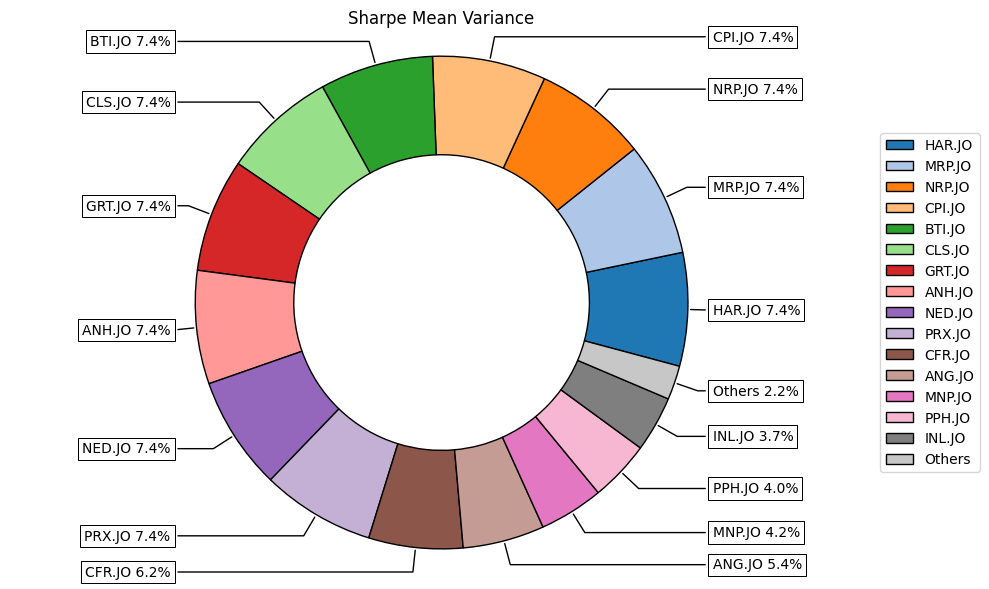

In [50]:
ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                  height=6, width=10, ax=None)

In [51]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,ABG.JO,AGL.JO,ANG.JO,ANH.JO,APN.JO,BHG.JO,BID.JO,BTI.JO,BVT.JO,CFR.JO,...,PRX.JO,REM.JO,RNI.JO,SBKP.JO,SHP.JO,SLM.JO,SOL.JO,SSW.JO,VOD.JO,WHL.JO
0,0.0000%,0.0000%,4.1672%,7.4390%,2.6050%,7.4390%,7.4390%,7.4390%,0.6740%,5.9885%,...,1.0121%,0.0000%,7.4386%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%
1,0.0000%,0.0000%,7.4390%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,...,7.4390%,0.0000%,0.0000%,0.1772%,0.0000%,7.4390%,0.0000%,0.0000%,0.0000%,0.0000%
2,0.0000%,0.0000%,7.4390%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,...,7.4390%,0.0000%,0.0000%,0.3330%,0.0000%,7.4390%,0.0000%,0.0000%,0.0000%,0.0000%
3,0.0000%,0.0000%,7.4390%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,...,7.4390%,0.0000%,0.0000%,0.4862%,0.0000%,7.4390%,0.0000%,0.0000%,0.0000%,0.0000%
4,0.0000%,0.0000%,7.4390%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,...,7.4390%,0.0000%,0.0000%,0.6384%,0.0000%,7.4390%,0.0000%,0.0000%,0.0000%,0.0000%


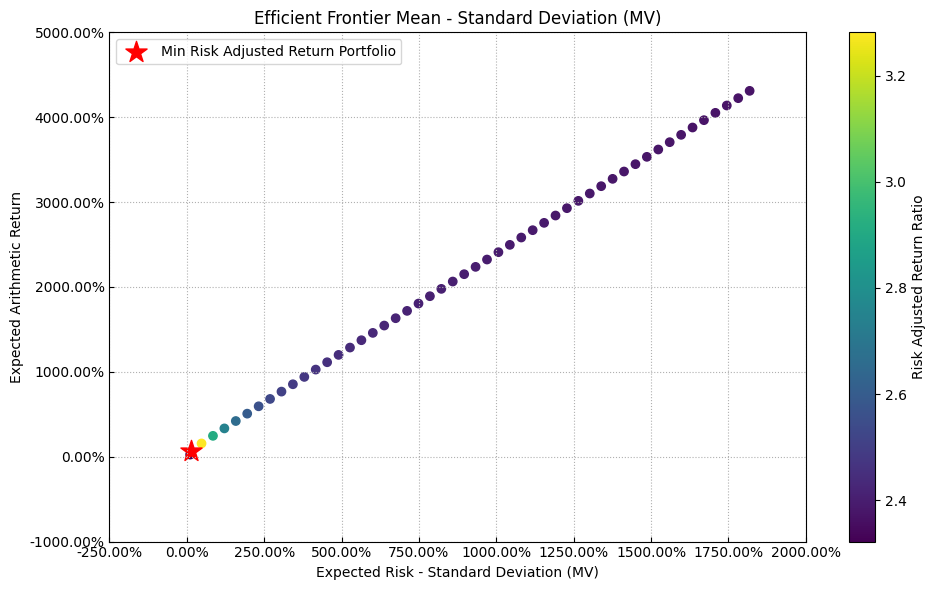

In [52]:
# Plotting the efficient frontier

label = 'Min Risk Adjusted Return Portfolio' # Title of point
mu = port.mu # Expected returns
cov = port.cov # Covariance matrix
returns = port.returns # Returns of the assets

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

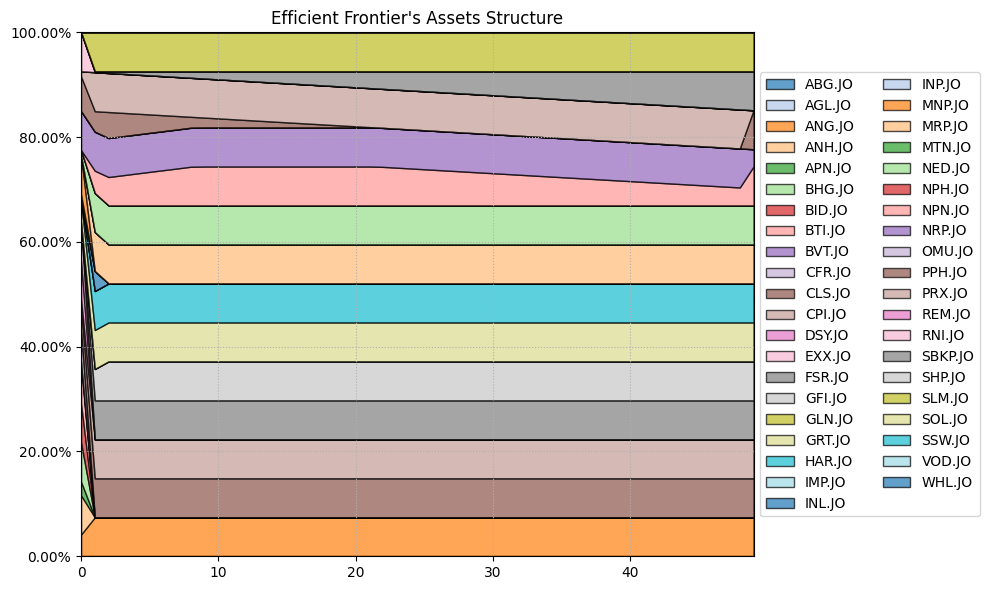

In [53]:
# Plotting efficient frontier composition

ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

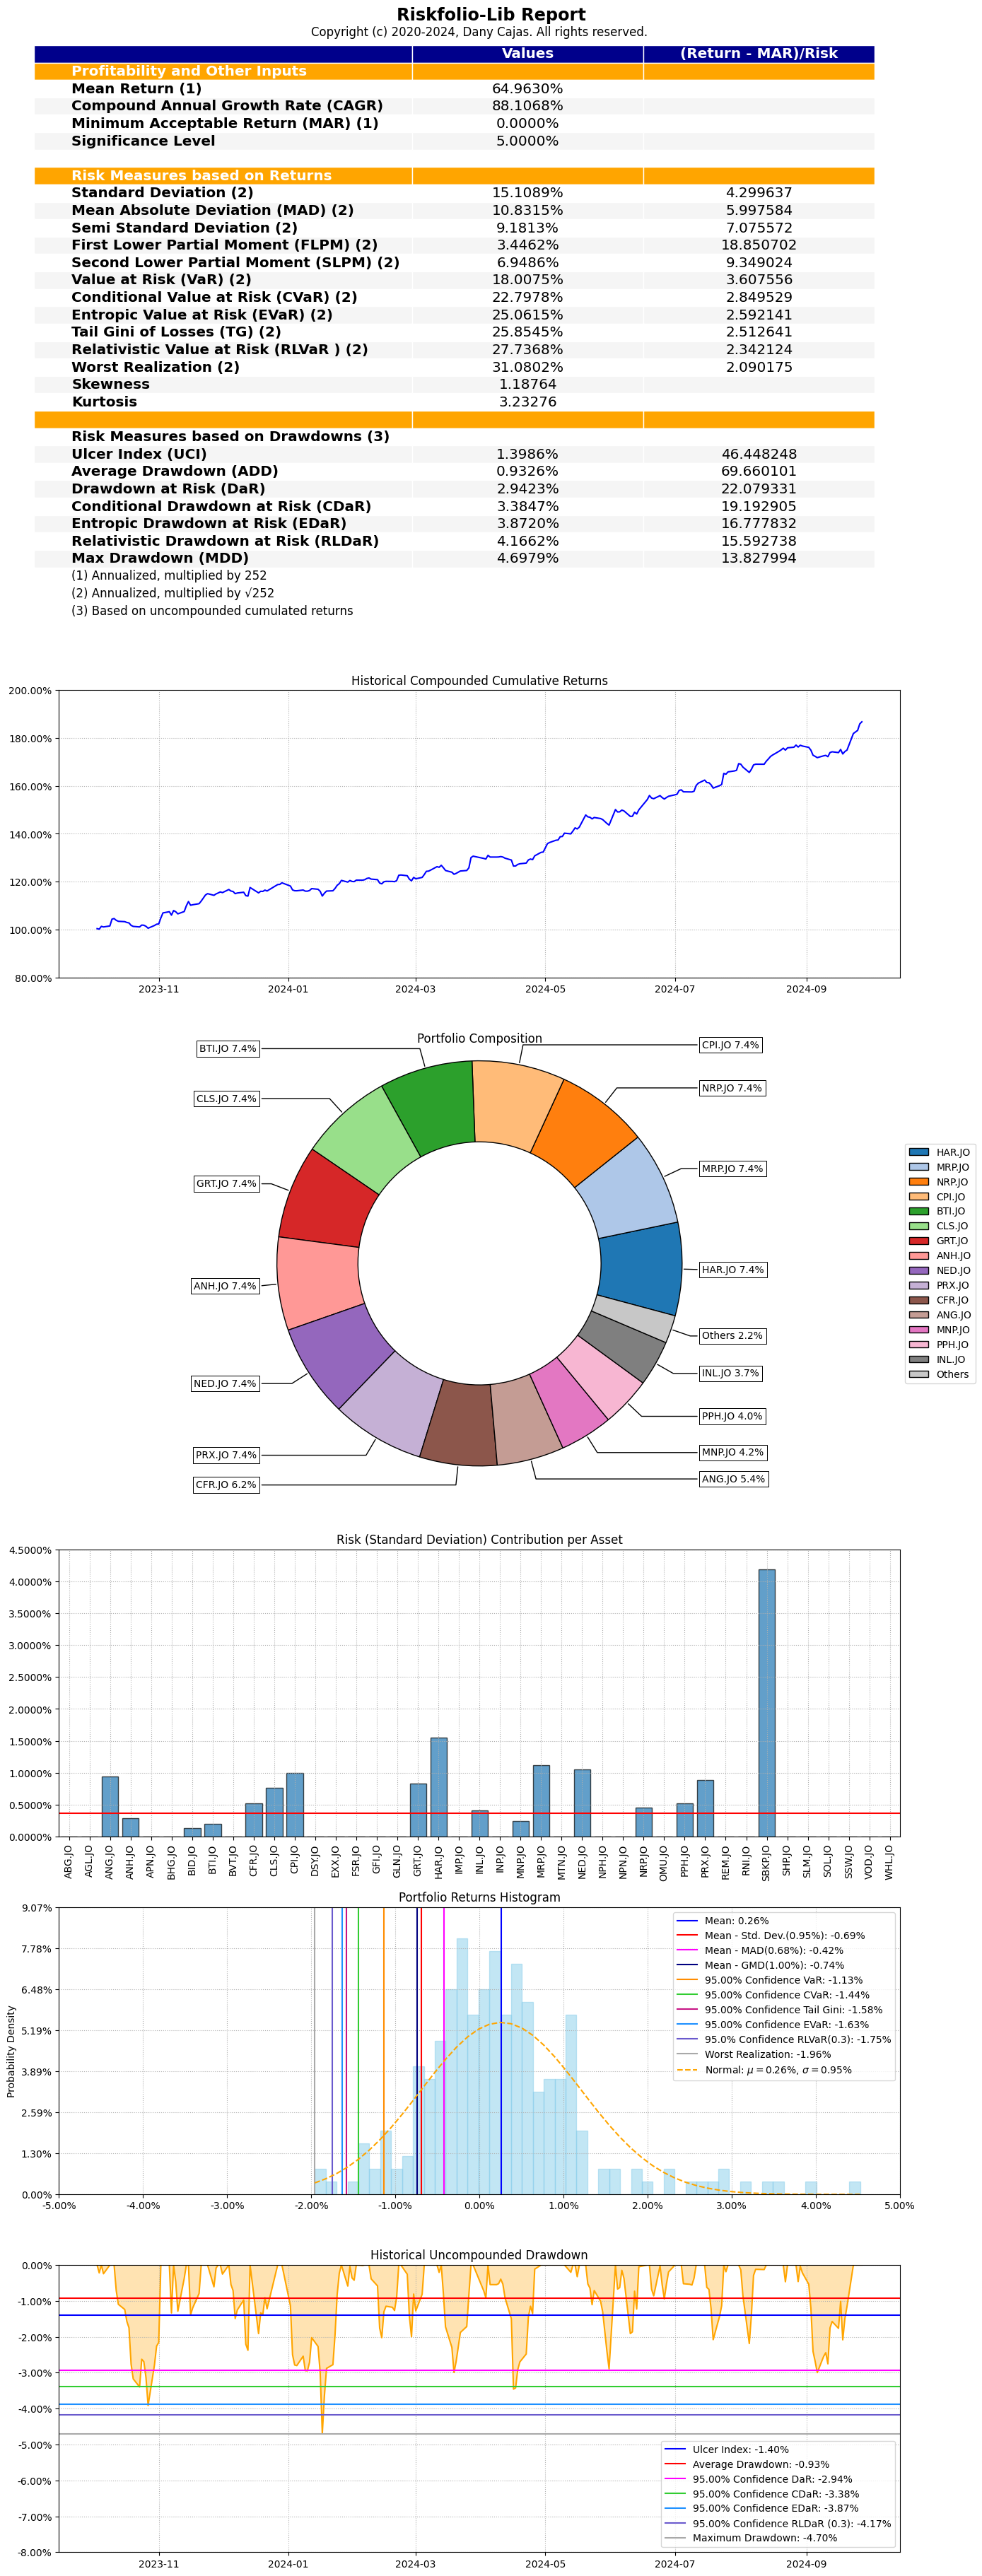

In [54]:
import matplotlib.pyplot as plt

ax = rp.jupyter_report(returns, w, rm=rm, t_factor = 252, days_per_year = 365)
plt.show()

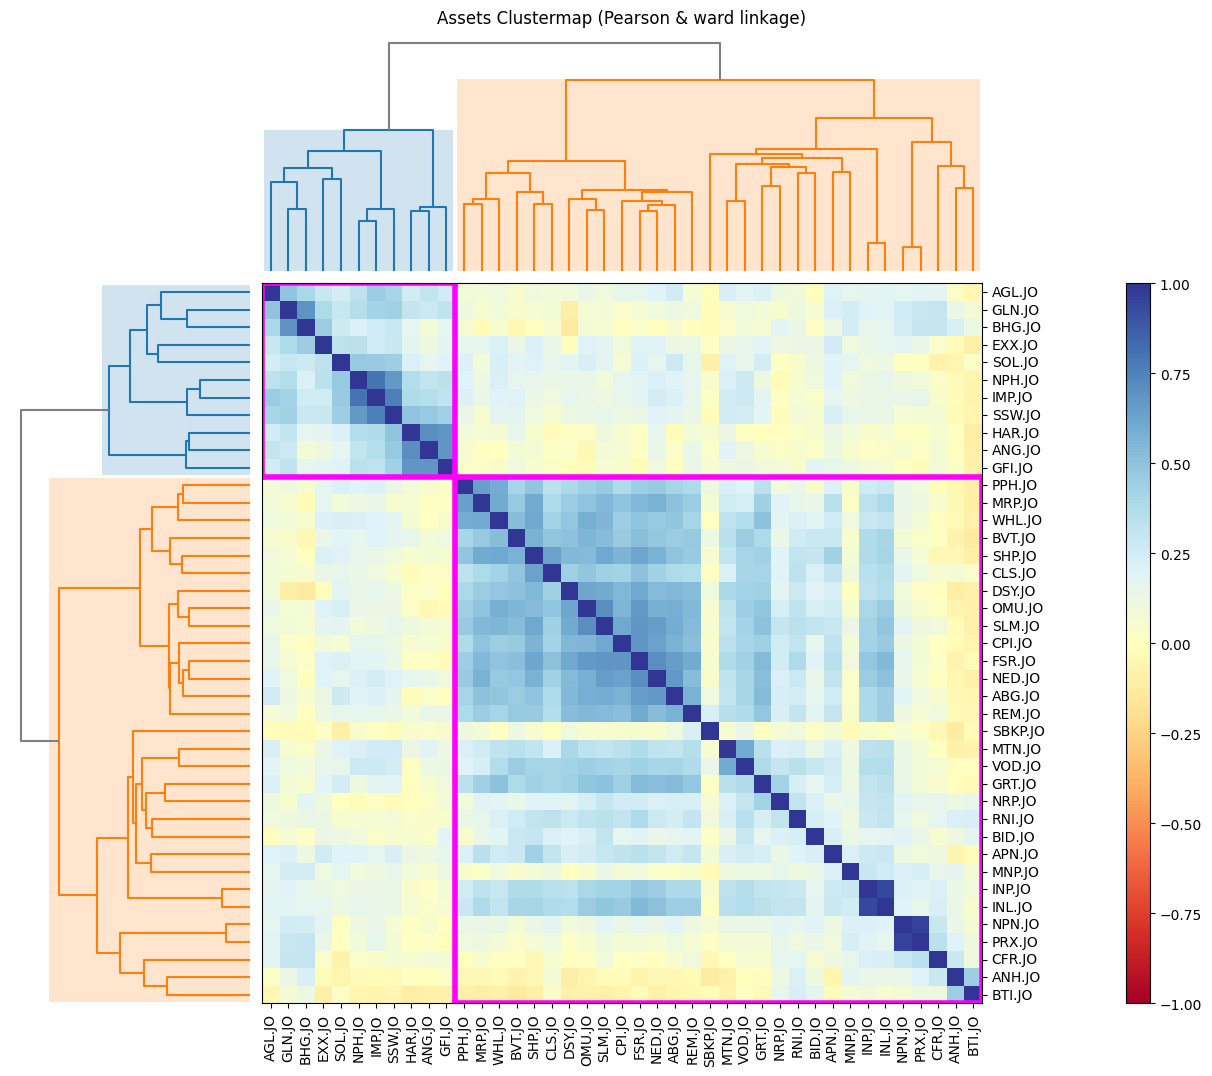

In [55]:
ax = rp.plot_clusters(returns,
                      codependence = "pearson",
                      linkage = "ward",
                      k = None,
                      max_k = 10,
                      leaf_order = True,
                      dendrogram = True,
                      ax = None)

In [56]:
# Building the portfolio object for the min risk in comparison

port = rp.Portfolio(returns=Y[assets])
# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov)

# Create Tracking Error Constraints

port.kindbench = False # True if you have benchmark weights, False if you have an index
port.benchindex = Y[market_index] # Index Returns
port.allowTE = True # Allows to use Tracking Error Constraints
port.TE = 0.002 # Maximum Tracking Error respect to benchmark returns

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = "MinRisk" # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w)

,weights
ABG.JO,3.5415%
AGL.JO,4.9972%
ANG.JO,3.4673%
ANH.JO,2.6898%
APN.JO,1.8329%
BHG.JO,2.5813%
BID.JO,4.0363%
BTI.JO,5.1787%
BVT.JO,2.6626%
CFR.JO,2.4772%


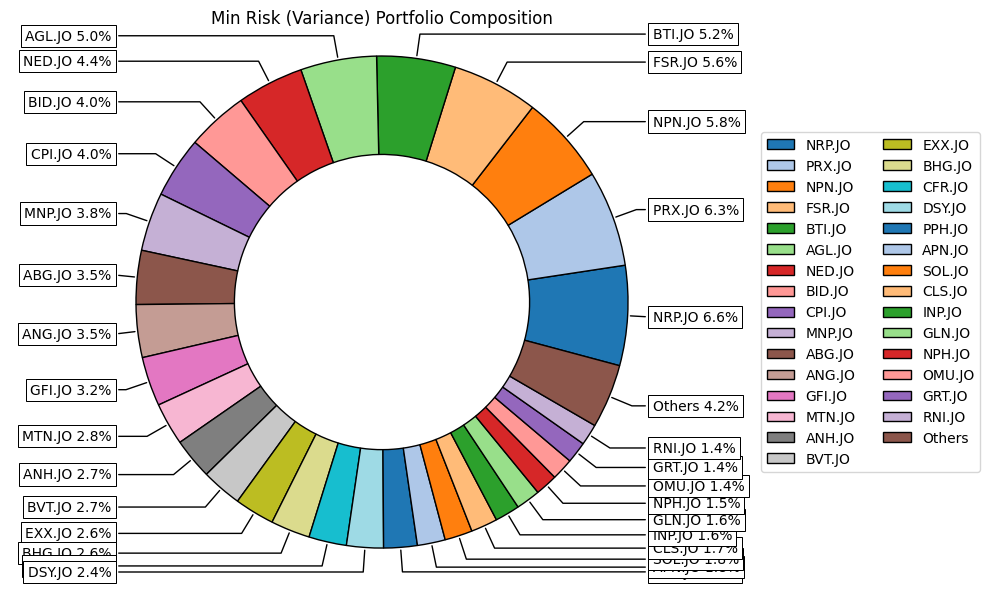

In [57]:
# Plotting the composition of the min risk portfolio

ax = rp.plot_pie(w=w, title='Min Risk (Variance) Portfolio Composition', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

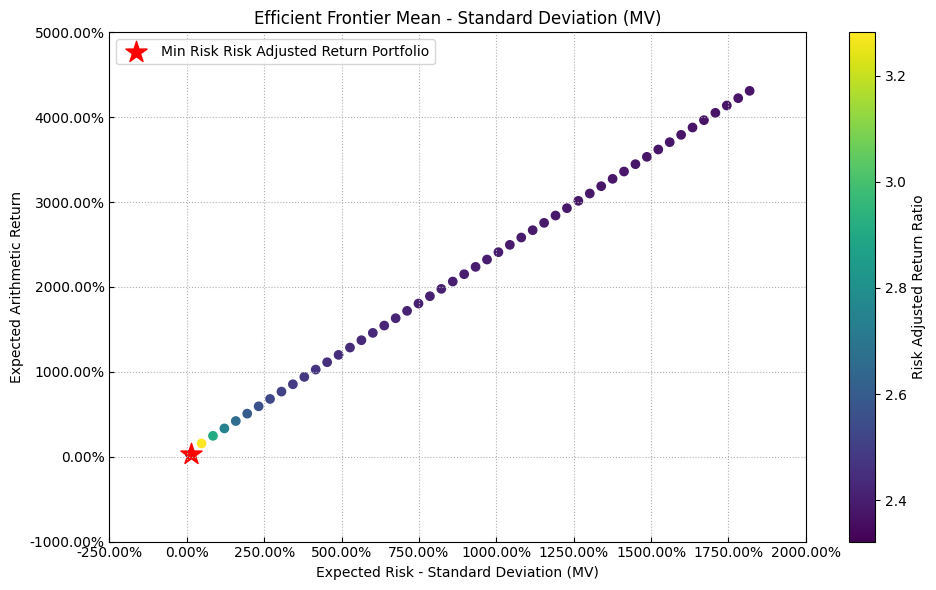

In [58]:
# Plotting the efficient frontier

label = 'Min Risk Risk Adjusted Return Portfolio' # Title of point
mu = port.mu # Expected returns
cov = port.cov # Covariance matrix
returns = port.returns # Returns of the assets

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

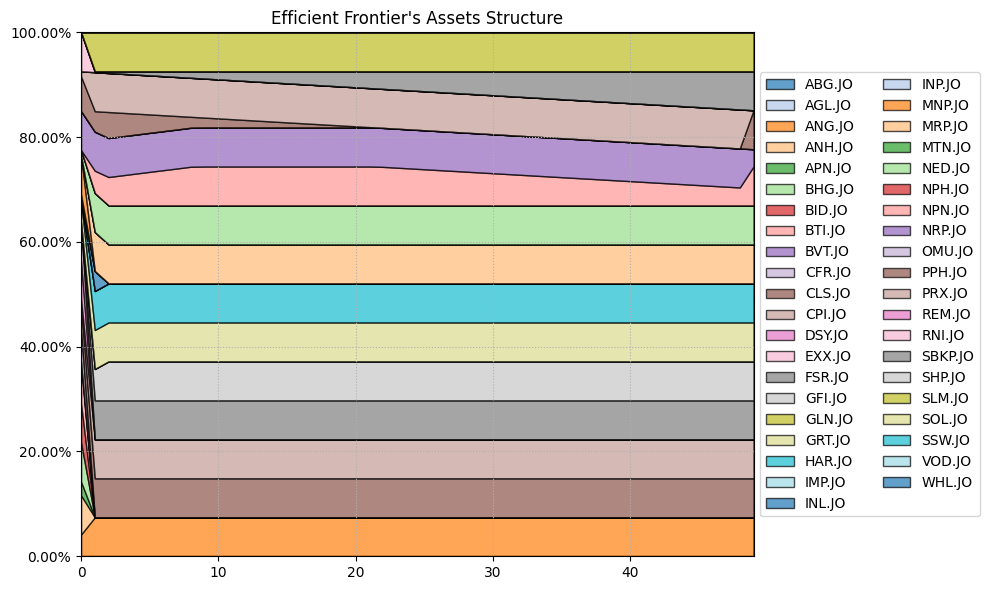

In [59]:
# Plotting efficient frontier composition

ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

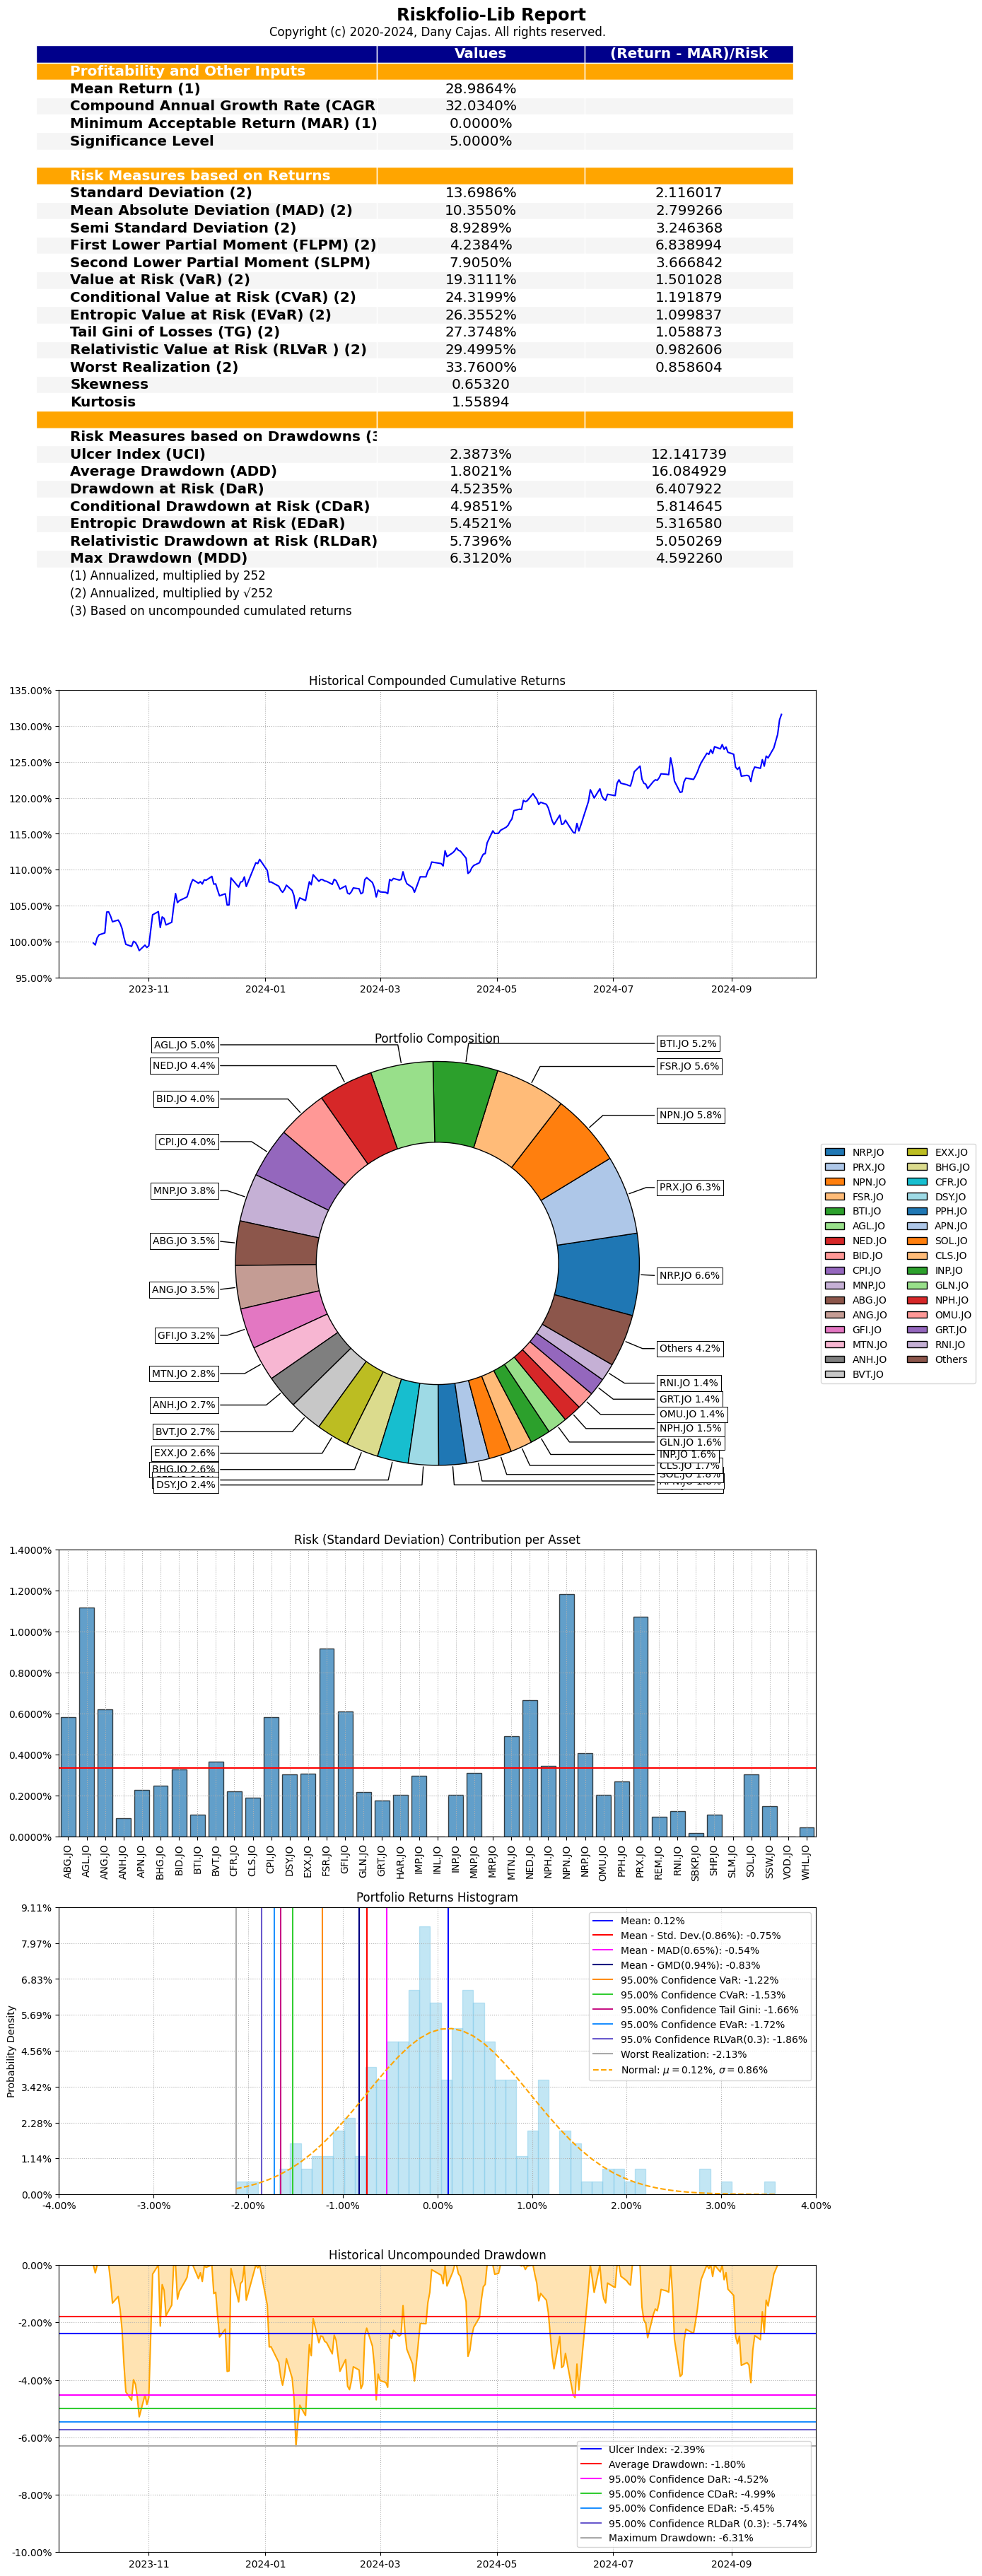

In [60]:
import matplotlib.pyplot as plt

ax = rp.jupyter_report(returns, w, rm=rm, t_factor = 252, days_per_year = 365)
plt.show()